In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import configparser
import logging
from logging import Formatter
from logging.handlers import RotatingFileHandler

In [4]:

columns_spam = ('tweet_id','airline_sentiment','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','text','tweet_coord','tweet_created','tweet_location','user_timezone')
spam = "C:/Users/krezn/PycharmProjects/NLPHelper/datasets/spam.csv"
spam_df = pd.read_csv(spam, encoding_errors='ignore')
spam_df = spam_df.drop(columns=['v1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
spam_df = spam_df.rename(columns={"v2":"text"})

spam_df.insert (0, 'tweet_id', '')
spam_df.insert (1, 'airline_sentiment', 'spam')
spam_df.insert (2, 'airline_sentiment_confidence', '')
spam_df.insert (3, 'negativereason', '')
spam_df.insert (4, 'negativereason_confidence', '')
spam_df.insert (5, 'airline', '')
spam_df.insert (6, 'airline_sentiment_gold', '')
spam_df.insert (7, 'name', '')
spam_df.insert (8, 'negativereason_gold', '')
spam_df.insert (9, 'retweet_count', '')
spam_df.insert (11, 'tweet_coord', '')
spam_df.insert (12, 'tweet_created', '')
spam_df.insert (13, 'tweet_location', '')
spam_df.insert (14, 'user_timezone', '')

spam_df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,,spam,,,,,,,,,"Go until jurong point, crazy.. Available only ...",,,,
1,,spam,,,,,,,,,Ok lar... Joking wif u oni...,,,,
2,,spam,,,,,,,,,Free entry in 2 a wkly comp to win FA Cup fina...,,,,
3,,spam,,,,,,,,,U dun say so early hor... U c already then say...,,,,
4,,spam,,,,,,,,,"Nah I don't think he goes to usf, he lives aro...",,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,,spam,,,,,,,,,This is the 2nd time we have tried 2 contact u...,,,,
5568,,spam,,,,,,,,,Will _ b going to esplanade fr home?,,,,
5569,,spam,,,,,,,,,"Pity, * was in mood for that. So...any other s...",,,,
5570,,spam,,,,,,,,,The guy did some bitching but I acted like i'd...,,,,


In [ ]:
spam_df

C:\Users\krezn\AppData\Local\Temp\ipykernel_7908\603443958.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  airline_tweets = airline_tweets.append(spam_df, ignore_index = True)


             tweet_id airline_sentiment airline_sentiment_confidence  \
0  570306133677760513           neutral                          1.0   
1  570301130888122368          positive                       0.3486   
2  570301083672813571           neutral                       0.6837   
3  570301031407624196          negative                          1.0   
4  570300817074462722          negative                          1.0   

  negativereason negativereason_confidence         airline  \
0            NaN                       NaN  Virgin America   
1            NaN                       0.0  Virgin America   
2            NaN                       NaN  Virgin America   
3     Bad Flight                    0.7033  Virgin America   
4     Can't Tell                       1.0  Virgin America   

  airline_sentiment_gold        name negativereason_gold retweet_count  \
0                    NaN     cairdin                 NaN             0   
1                    NaN    jnardino          

<AxesSubplot:xlabel='airline'>

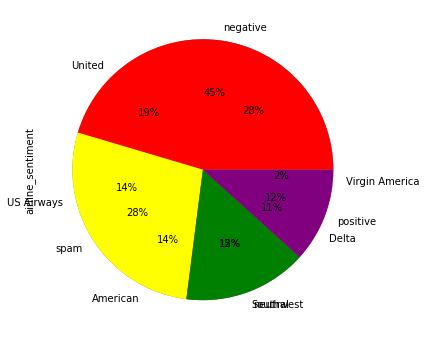

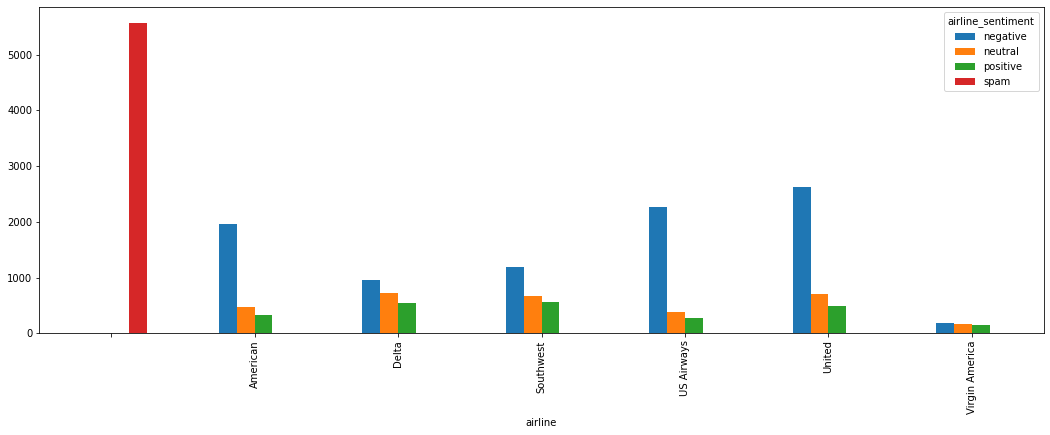

In [20]:


data_source_url = "C:/Users/krezn/PycharmProjects/NLPHelper/datasets/final_en.csv"
airline_tweets = pd.read_csv(data_source_url)

airline_tweets = airline_tweets.append(spam_df, ignore_index = True)

airline_tweets.to_csv('new_dataset.csv', index=False)
print(airline_tweets.head())
plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])
plot_size[0] = 18
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green", 'purple'])
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

Text(0.5, 1.0, 'Статистика по английскому датасету:')

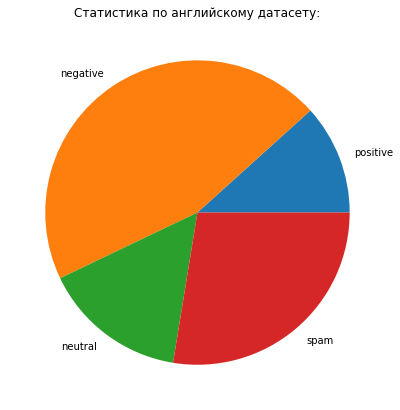

In [23]:
cars = ['positive', 'negative', 'neutral', 'spam']
data_array = [2363, 9178,3099, 5571]
# Creating plot
fig = plt.figure(figsize=(10, 7))
plt.pie(data_array, labels=cars)
plt.title('Статистика по английскому датасету:')


In [21]:
airline_tweets['airline_sentiment'].value_counts()

negative    9178
spam        5572
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [10]:

features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    # Converting to Lowercase
    processed_feature = processed_feature.lower()
    processed_features.append(processed_feature)

In [12]:
with open('C:/Users/krezn/PycharmProjects/NLPHelper/stopwords/english', 'r') as fp:
    # считываем сразу весь файл
    data = list(fp.read())

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer ( min_df=1, max_df=0.8, stop_words=data)
processed_features = vectorizer.fit_transform(processed_features).toarray()


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [15]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [16]:
predictions = text_classifier.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1764   58    6    4]
 [ 358  234   28    7]
 [ 242   51  157    7]
 [  42    0    3 1082]]
              precision    recall  f1-score   support

    negative       0.73      0.96      0.83      1832
     neutral       0.68      0.37      0.48       627
    positive       0.81      0.34      0.48       457
        spam       0.98      0.96      0.97      1127

    accuracy                           0.80      4043
   macro avg       0.80      0.66      0.69      4043
weighted avg       0.80      0.80      0.78      4043

0.8006430868167203


In [18]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(text_classifier, filename)

['finalized_model.sav']

In [19]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.8006430868167203


In [ ]:
test_url = "/Users/19459820/PycharmProjects/NLPHelper/youtuberesults-ru-1.csv"
airline_tweets = pd.read_csv(test_url)
features = airline_tweets.iloc[:, 3].values

test_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    test_feature = re.sub(r'\W', ' ', str(features[sentence]))
    # remove all single characters
    test_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', test_feature)
    # Remove single characters from the start
    test_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', test_feature)
    # Substituting multiple spaces with single space
    test_feature = re.sub(r'\s+', ' ', test_feature, flags=re.I)
    # Removing prefixed 'b'
    test_feature = re.sub(r'^b\s+', '', test_feature)
    # Converting to Lowercase
    test_feature = test_feature.lower()
    test_features.append(test_feature)

print(test_features)

In [ ]:
test_features = vectorizer.transform(test_features).toarray()

In [ ]:
predictions = loaded_model.predict(test_features)

In [ ]:
print(predictions)

In [ ]:
test_features = []

for sentence in range(0, len(comment_payload)):
    # Remove all the special characters
    test_feature = re.sub(r'\W', ' ', str(comment_payload[sentence]))
    # remove all single characters
    test_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', test_feature)
    # Remove single characters from the start
    test_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', test_feature)
    # Substituting multiple spaces with single space
    test_feature = re.sub(r'\s+', ' ', test_feature, flags=re.I)
    # Removing prefixed 'b'
    test_feature = re.sub(r'^b\s+', '', test_feature)
    # Converting to Lowercase
    test_feature = test_feature.lower()
    test_features.append(test_feature)

print(test_features)

In [ ]:
test_features = vectorizer.transform(test_features).toarray()

In [ ]:
predictions = loaded_model.predict(test_features)

In [ ]:
predictions = list(predictions)
pos_count = predictions.count('positive')
neg_count = predictions.count('negative')
neu_count = predictions.count('neutral')
print(pos_count)
print(neg_count)
print(neu_count)

In [ ]:
youtube_url = 'http://www.youtube.com/watch?v=ZFqlHhCNBOI'

regex = re.compile(r'(https?://)?(www\.)?(youtube|youtu|youtube-nocookie)\.(com|be)/(watch\?v=|embed/|v/|.+\?v=)?(?P<id>[A-Za-z0-9\-=_]{11})')

match = regex.match(youtube_url)

if not match:
    print('no match')
print(match.group('id'))